In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def b_k(y_k, u_k):
    return 0

def phi_k(y_k, u_k):
    return np.array([0.2 * y_k + 0.1 * u_k])

def F_k(t):
    return 1000 + np.random.random()
    # return np.cos(t * 10)

In [27]:
# Define Dimensions
n_x = 2
n_theta = 6

In [28]:
# Initialise parameters
P = np.eye(n_x)
R = 0.1 * np.eye(n_x)
Q = 0.1 * np.eye(n_x)
Upsilon = np.zeros((n_x, n_theta))
S = np.eye(n_theta)

llama = 0.995
a = 0.999

x_hat = np.zeros((n_x,1))
theta_hat = np.zeros((n_theta,1))

# Initial state
x_true = np.array([[10.0], [2.0]])  # Initial position and velocity

In [29]:
# System parameters (unknown, to be estimated)
k_true = 5  # Spring constant
b_true = 2  # Damping coefficient
m_true = 10  # Mass

In [30]:
ts = 5
dt = 0.001
N = int(ts/dt)
x_estimates = []
x_trues = []
theta_estimates = []
time = np.arange(N) * dt

In [31]:
for k in range(N):
    Fk = F_k(k * dt)
    Phi_k = np.array([
        [x_true[0, 0], x_true[1, 0], Fk, 0, 0, 0],
        [0, 0, 0, x_true[0, 0], x_true[1, 0], Fk]
    ])

    # Compute gains
    P = P + Q
    Sigma = P + R
    K = P @ np.linalg.inv(Sigma)
    P = (np.eye(n_x) - K) @ P


    Omega = Upsilon + Phi_k
    Upsilon = (np.eye(n_x) - K) @ Upsilon + (np.eye(n_x) - K) @ Phi_k
    Lambda = np.linalg.inv(llama * Sigma + Omega @ S @ Omega.T)
    Pi = S @ Omega.T @ Lambda
    S = (1 / llama) * S - (1/ llama) * S @ Omega.T @ Lambda @ Omega @ S

    # Estimate state and parameters
    y_k = x_true  # Assume perfect measurements (no noise)
    theta_previous = theta_hat.copy()
    innovation = y_k - (x_hat + Phi_k @ theta_previous)
    theta_hat = theta_previous + Pi @ innovation
    x_hat = x_hat + Phi_k @ theta_previous + K @ innovation + Upsilon @ (theta_hat - theta_previous)
    # theta_hat = theta_hat + theta_update
    
    # Update Covariance matrices
    Q = a * Q + (1 - a) * (K @ (innovation @ innovation.T) @ K.T)
    R = a * R + (1 - a) * (innovation @ innovation.T + P)

    # Store results
    x_estimates.append(x_hat.flatten())
    theta_estimates.append(theta_hat.flatten())

    # True system update
    x_true = x_true + np.array([
        [0, dt],
        [-k_true * dt / m_true, -b_true * dt / m_true]
    ]) @ x_true + np.array([[0], [dt / m_true]]) * Fk

    x_trues.append(x_true.flatten())

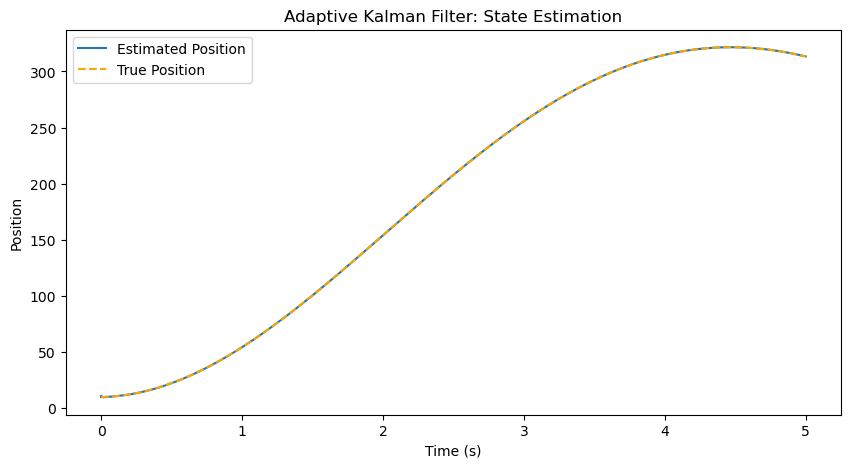

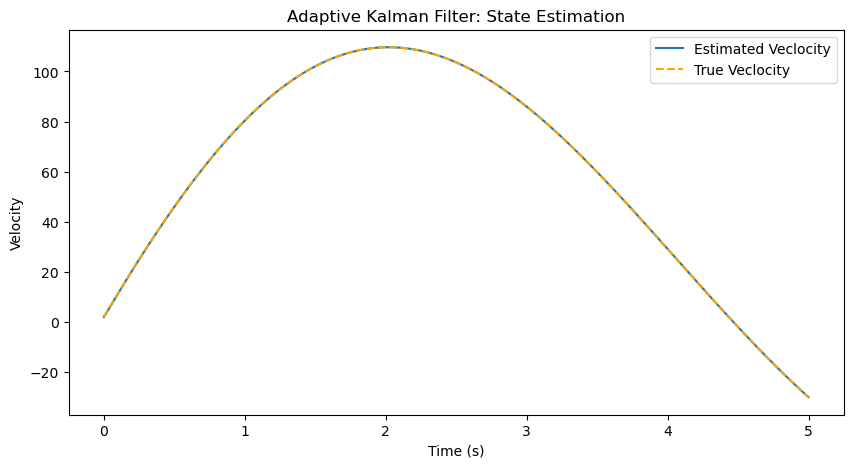

In [32]:
# Convert lists to arrays
x_estimates = np.array(x_estimates)
theta_estimates = np.array(theta_estimates)
x_trues = np.array(x_trues)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, x_estimates[:, 0], label="Estimated Position")
plt.plot(time, x_trues[:, 0], linestyle="--", color="orange", label="True Position")
# plt.plot(time, x_estimates[:, 1], label="Estimated Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.legend()
plt.title("Adaptive Kalman Filter: State Estimation")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(time, x_estimates[:, 1], label="Estimated Veclocity")
plt.plot(time, x_trues[:, 1], linestyle="--", color="orange", label="True Veclocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity")
plt.legend()
plt.title("Adaptive Kalman Filter: State Estimation")
plt.show()

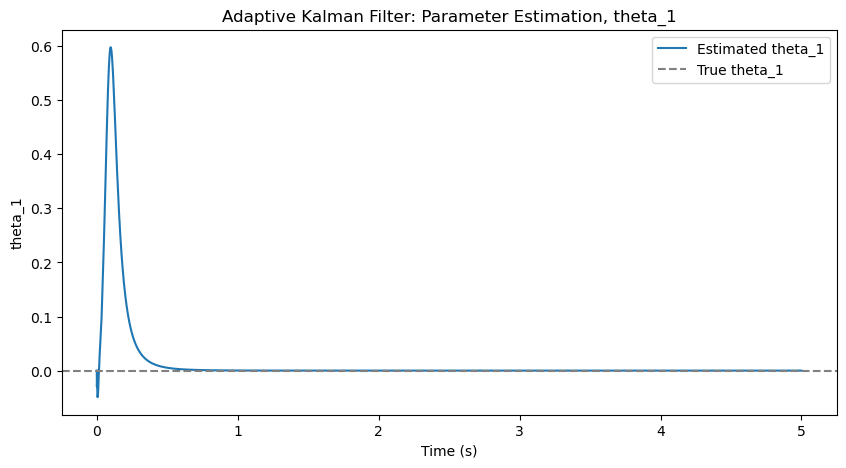

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 0], label="Estimated theta_1")
plt.axhline(0, linestyle="--", color="gray", label="True theta_1")
plt.xlabel("Time (s)")
plt.ylabel("theta_1")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation, theta_1")
plt.show()

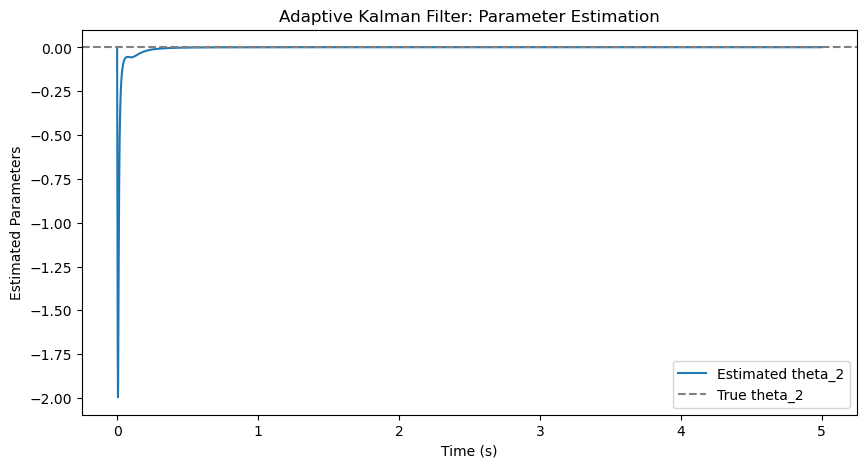

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 1], label="Estimated theta_2")
plt.axhline(dt, linestyle="--", color="gray", label="True theta_2")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()

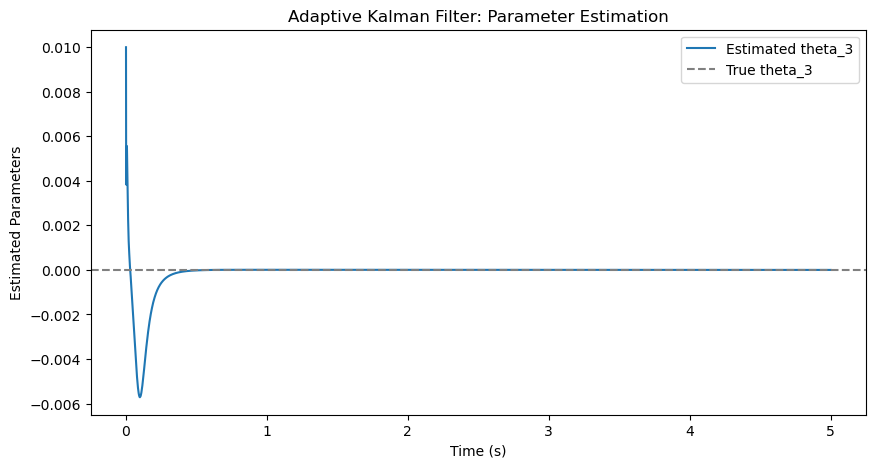

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 2], label="Estimated theta_3")
plt.axhline(0, linestyle="--", color="gray", label="True theta_3")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()

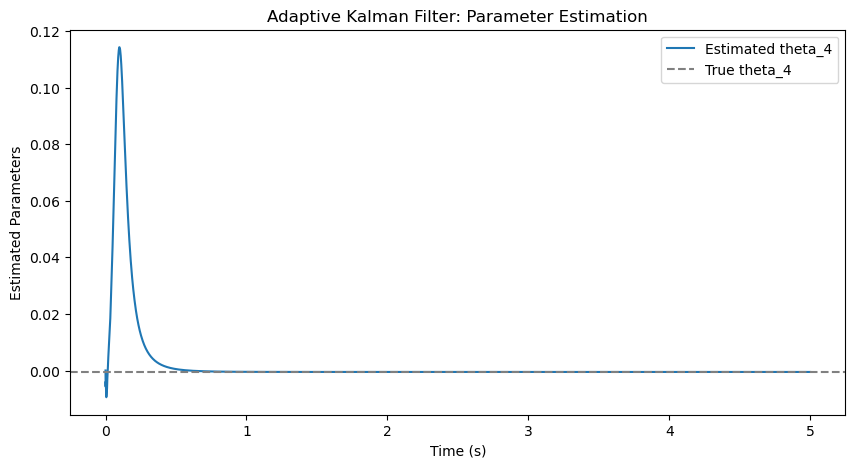

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 3], label="Estimated theta_4")
plt.axhline(-k_true * dt / m_true, linestyle="--", color="gray", label="True theta_4")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()

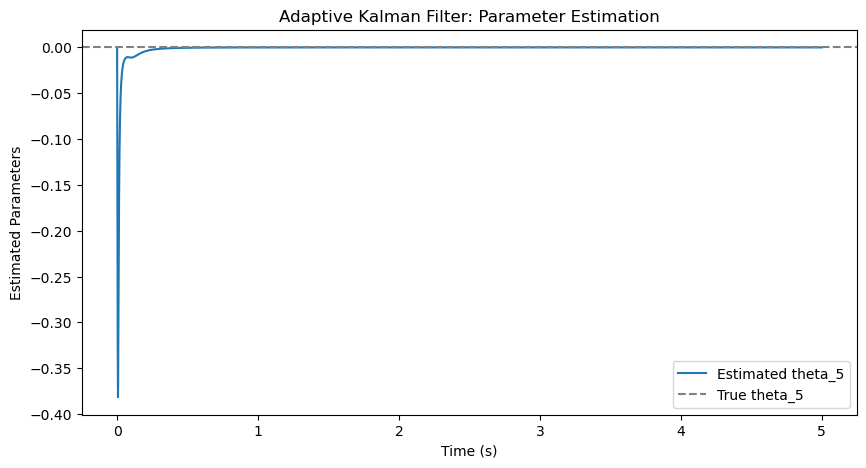

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 4], label="Estimated theta_5")
plt.axhline(-b_true * dt / m_true, linestyle="--", color="gray", label="True theta_5")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()

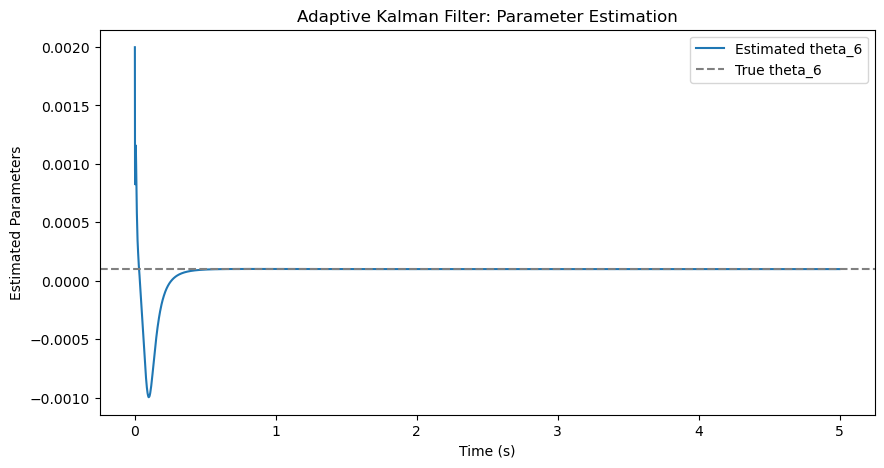

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 5], label="Estimated theta_6")
plt.axhline(dt / m_true, linestyle="--", color="gray", label="True theta_6")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()

In [15]:
m_estimate = dt/ theta_estimates[-1, 5]
print("m estimate: ", float(m_estimate))

m estimate:  9.997890584826676


In [16]:
k_estimate = - theta_estimates[-1, 3]/ theta_estimates[-1, 5]
print("k estimate: ", float(k_estimate))

k estimate:  4.999981319444531


In [17]:
b_estimate = - theta_estimates[-1, 4]/ theta_estimates[-1, 5]
print("b estimate: ", float(b_estimate))

b estimate:  1.9950564104336337
